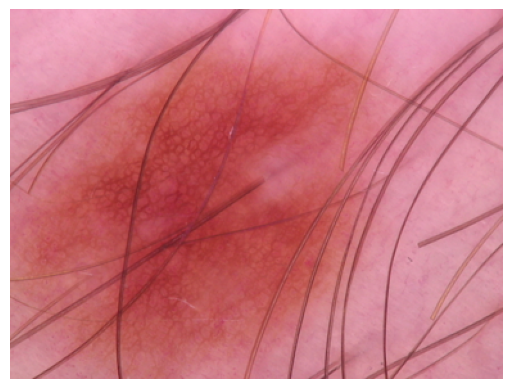

In [139]:
# test for removing hair and masking the image

# import EVERYTHING !!
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import morphology
from util.img_util_example_solution import ImageDataLoader as IDL
from util.inpaint_util import removeHair as rH


# set up data loader and an iterator for it
data_loader = IDL("data/Data", shuffle=False)

data_iterator = iter(data_loader)

# select image N by running a for loop (in the final version we'll run a for loop over every image of course)
for i in range(50):
    img_rgb, img_gray = next(data_iterator)

# the image is correctly loaded
plt.imshow(img_rgb)
plt.axis('off');

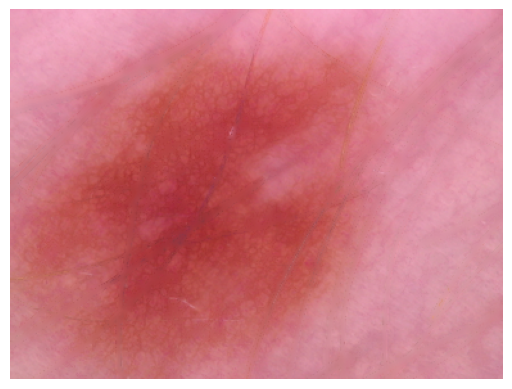

In [140]:
# remove the hair from the image
_, _, img_noHair = rH(img_rgb, img_gray)

# updated image
plt.imshow(img_noHair)
plt.axis('off');




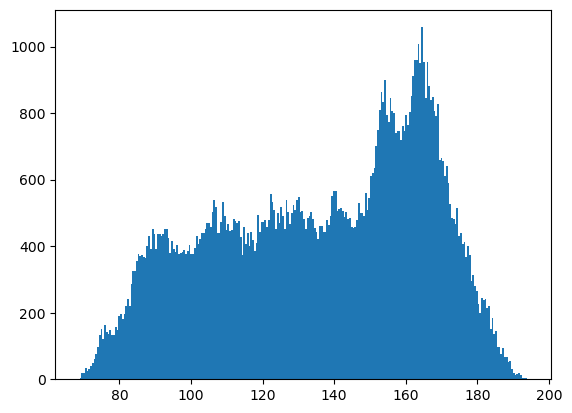

In [141]:
# scale the values appropriately (they are defaulted to be from 0 to 1)
img_mod = rgb2gray(img_noHair) * 256

# plot the histogram
im_hist = plt.hist(img_mod.flatten(), bins= 256)


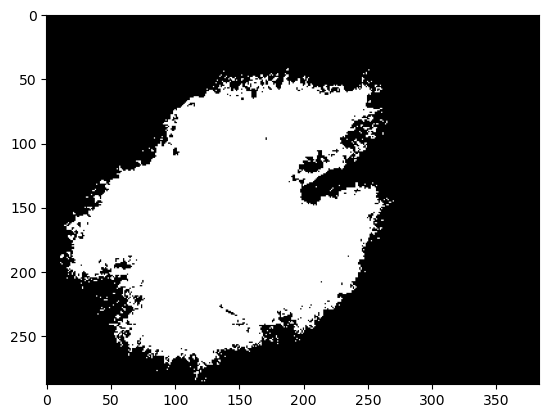

In [142]:
# create a mask (120 is the suggested threshold that should work for all images)
# ADD MASK TO TURN WHITE HAIR INTO BLACK ONES IT MIGHT MAKE IT MUCH BETTER
im_mask = img_mod <= 120
plt.imshow(im_mask, cmap= 'gray')

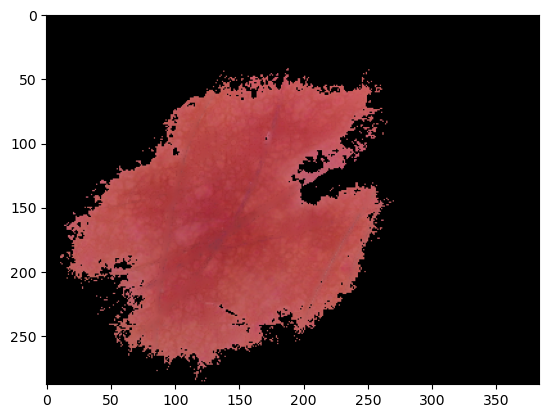

In [143]:
# apply the mask to the images
img_noHair[im_mask==0] = 0
img_gray[im_mask==0] = 0

# this is the brush, the number should indicate the size
struct_el = morphology.disk(2)

# arbitrary usage of the brush, feel free to test more
mask_dilated = morphology.binary_erosion(morphology.binary_dilation(morphology.binary_dilation(im_mask, struct_el), struct_el), struct_el)

# apply the updated mask onto the image
img_noHair[mask_dilated==0] = 0

# final result
plt.imshow(img_noHair, cmap = 'gray')